In [1]:
#1. How many rows are there ?
import pandas as pd

#Load dataset into dataframe
df = pd.read_csv('uncleandata.csv')

#Print the number of rows
row = df.shape[0]
print(f"The dataset has {row} rows.")

The dataset has 15099 rows.


In [2]:
#2. How many columns are there ? What are they?

#Print the number of collumns
collumn = df.shape[1]
print(f"The dataset has {collumn} collumns.")

The dataset has 11 collumns.


In [3]:
#3. How many features? What are they ?

#State the target
target = 'left'

#Print the features
features = [col for col in df.columns if col != target]
print(f"There are {len(features)} features:")
print(features)

There are 10 features:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'promotion_last_5years', 'is_smoker', 'department', 'salary']


In [4]:
#4. How many duplicates if any ?

dup = df.duplicated().sum()
print(f"Number of duplicate rows: {dup}")

Number of duplicate rows: 2840


In [5]:
#5. Remove duplicates if there are any.

df = df.drop_duplicates().reset_index(drop=True)

In [6]:
#6. Print the distributions of each features. What do you see ?
print("Features summary:")
print(df[features].describe())

Features summary:
       satisfaction_level  last_evaluation  number_project  \
count        12259.000000     12259.000000    12259.000000   
mean             0.628149         0.716666        3.804389   
std              0.241893         0.168627        1.170172   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  work_accident  \
count          11891.000000        12109.000000   12259.000000   
mean             200.511732            3.380048       0.153928   
std               48.843440            1.356414       0.360894   
min               96.000000            2.000000       0.000000   
25%              157.000000            3.000000       0.000000   
50%              200.000000

In [7]:
#7. How many missing values are there ? What features have missing values ?

#Calculate missing values per column
missings = df.isnull().sum()
print(f"Missing values per feature: {missings}")

#Calculate the total number of missing values in the dataset
total_missing = missings.sum()
print(f"Total missing values in the dataset: {total_missing}")

#Identify features with missing values
missing_features = missings[missings > 0]
print("\nFeatures with missing values: ")
print(missing_features)

Missing values per feature: satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours       368
time_spend_company         150
work_accident                0
left                         0
promotion_last_5years        0
is_smoker                12024
department                   0
salary                       0
dtype: int64
Total missing values in the dataset: 12542

Features with missing values: 
average_montly_hours      368
time_spend_company        150
is_smoker               12024
dtype: int64


In [8]:
#8. Drop the features with largest number of missing values and fill up the rest of the features with missing values with mean. Can you explain why did we drop the feature with largest portion of missing values in this case ?

#Identify the feature with the largest number of missing values
max_missing_feature = missings.idxmax()
print(f"\nThe feature with the largest missing values: {max_missing_feature}")

#Drop the feature
df.drop(columns=[max_missing_feature], inplace=True)

#Fill other missing values with the mean
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

#9. Show that there are no missing values in the data at this point

#Verify missing values after cleaning
print("\nMissing values per feature after cleaning: ")
print(df.isnull().sum())


The feature with the largest missing values: is_smoker

Missing values per feature after cleaning: 
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


In [9]:
#10. Feature "left" has values 'yes' and 'no'. Convert those values into integer values, 1 and 0.

#Actually converting
df['left'] = df['left'].map({'yes': 1, 'no': 0})

#Print to show convertion
print(df['left'].head(20))

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: left, dtype: int64


In [ ]:
#11. Save the cleaned df into a new file
df.to_csv('cleaned_data.csv', index=False)

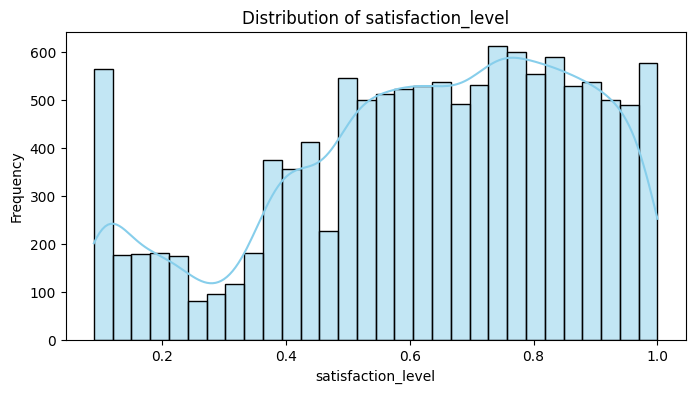

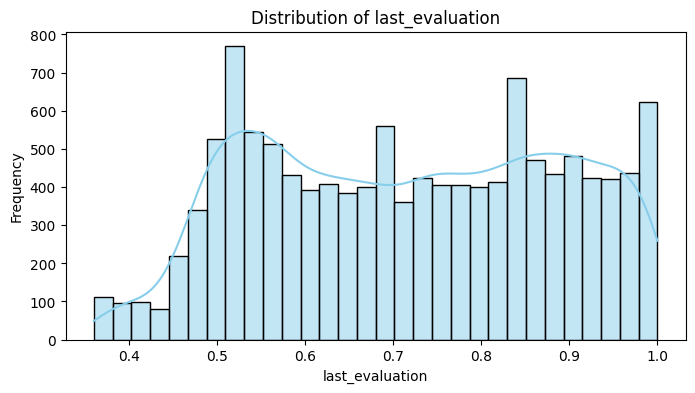

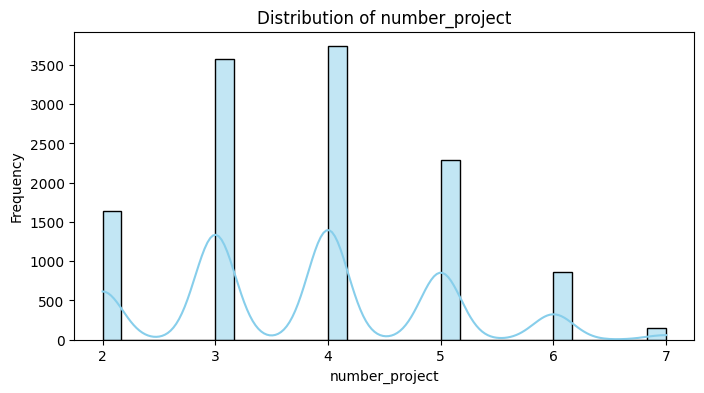

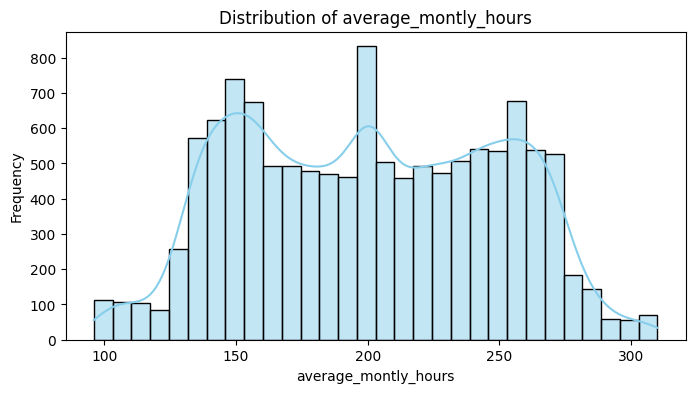

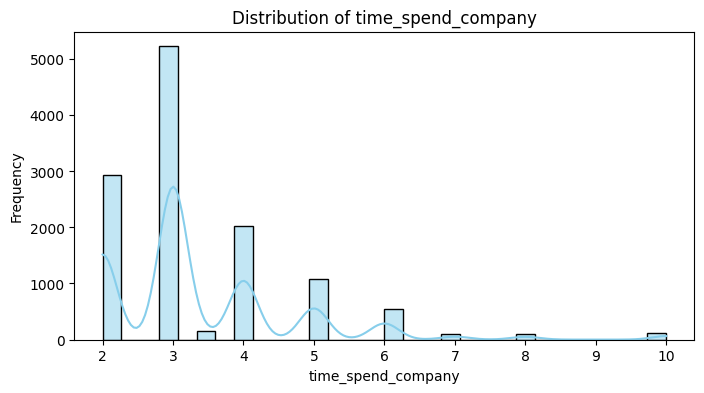

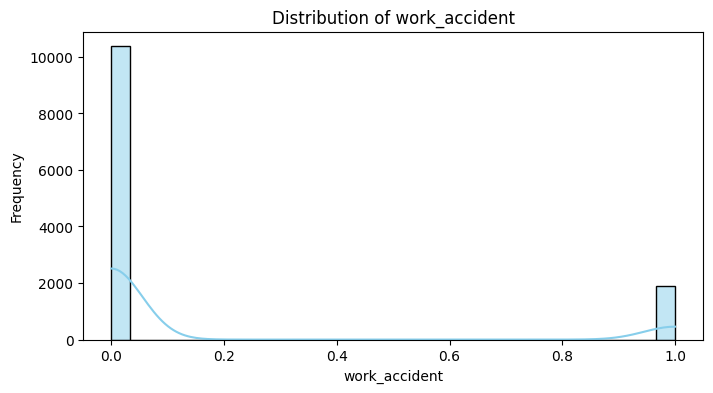

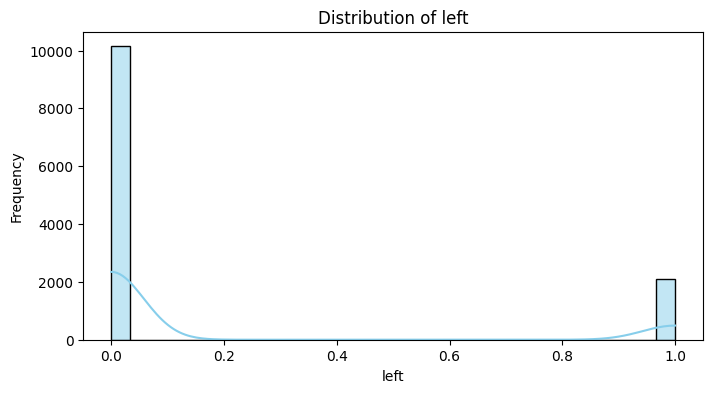

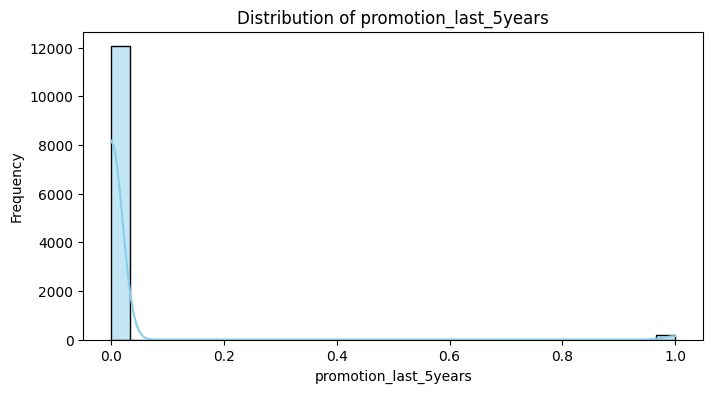


Values counts for 'department':
department
sales          3321
technical      2282
support        1861
IT              998
product_mng     704
RandD           698
marketing       690
accounting      629
hr              611
management      465
Name: count, dtype: int64


C:\Users\demo\AppData\Local\Temp\ipykernel_1316\4275463036.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


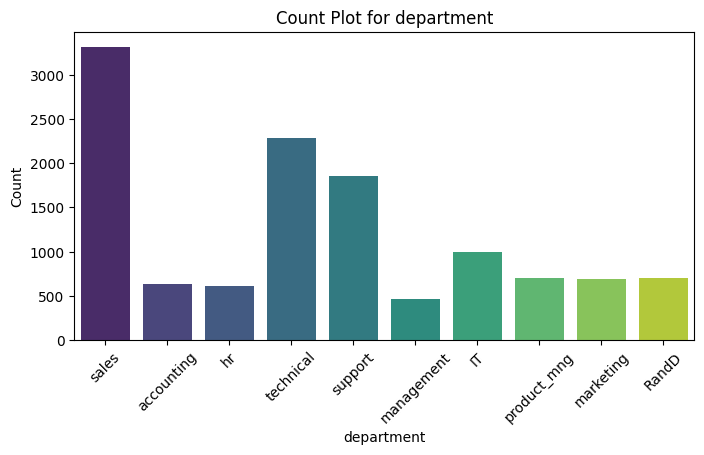


Values counts for 'salary':
salary
low       5872
medium    5360
high      1027
Name: count, dtype: int64


C:\Users\demo\AppData\Local\Temp\ipykernel_1316\4275463036.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


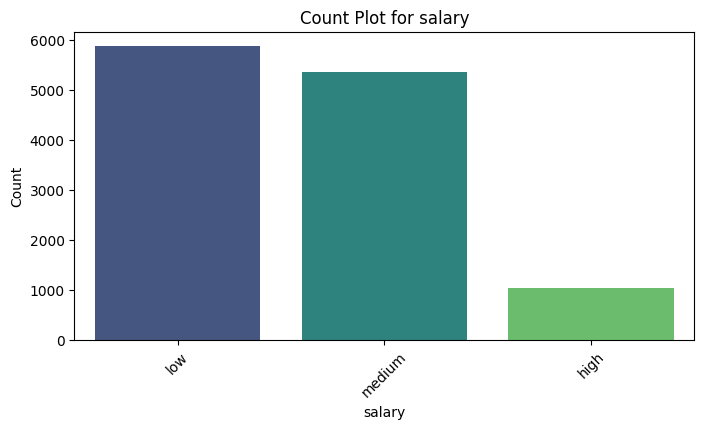


Distribution of the target variable 'left':
left
0    10144
1     2115
Name: count, dtype: int64


C:\Users\demo\AppData\Local\Temp\ipykernel_1316\4275463036.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='left', data=df, palette='pastel')


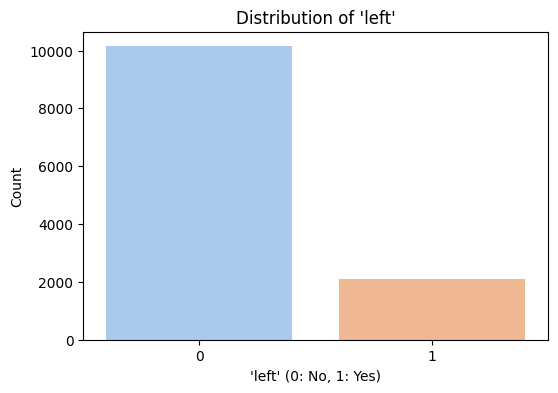

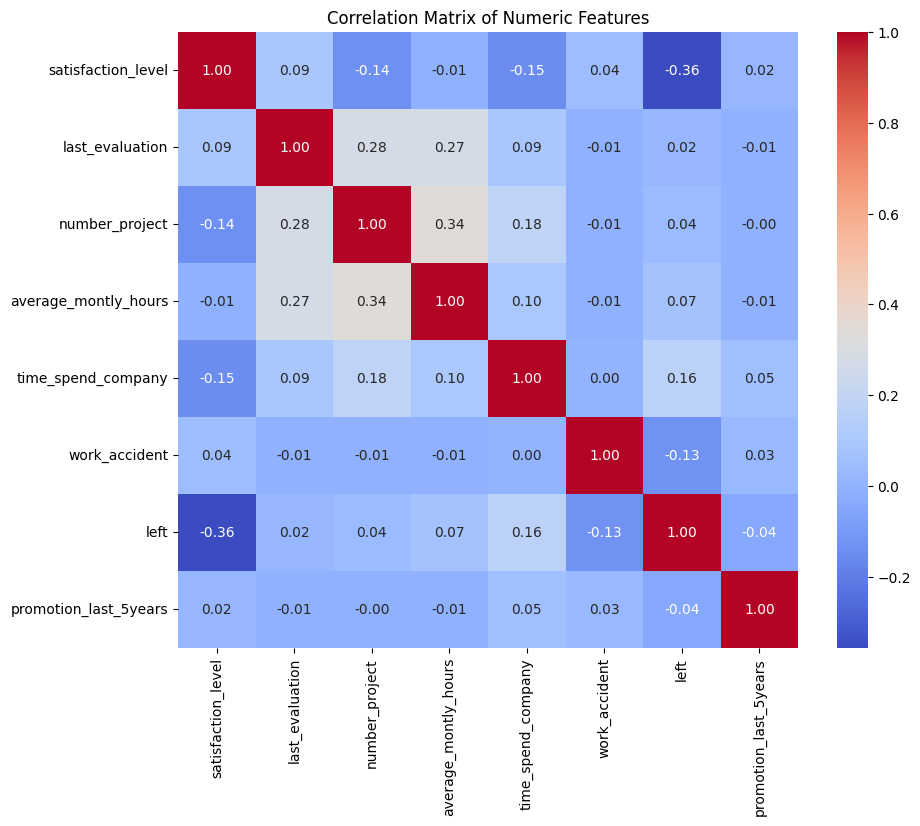

In [16]:
#12. What else do you observe in this data set?
import matplotlib.pyplot as plt
import seaborn as sns

#Visualize distribution for each feature
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numeric_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

#Check value counts to assess imbalances and frequency
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

if categorical_features:
    for col in categorical_features:
        print(f"\nValues counts for '{col}':")
        print(df[col].value_counts(dropna=False))
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, palette='viridis')
        plt.title(f"Count Plot for {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation= 45)
        plt.show()

else:
    print("\nThere are no categorical features after cleaning")


#Assess the variable 'left': Checking balance after conversion
print("\nDistribution of the target variable 'left':")
print(df['left'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='left', data=df, palette='pastel')
plt.title("Distribution of 'left'")
plt.xlabel("'left' (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

#Correlation Matrix: 
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [15]:
#Divide the data into training set(80%) and test set(20%) and show the number of data points in each by following
#Uniform sampling
#Stratified sampling based on the ratio of "yes" and "no" values of feature "left"
#How would you do the test set and training set sampling and why ?

from sklearn.model_selection import train_test_split

#Separate the features and the target variable
x = df.drop("left", axis=1)
y = df['left']

#Uniform sampling
X_train_uniform, X_test_uniform, y_train_uniform, y_test_uniform = train_test_split(
    x, y, test_size=0.2, random_state=42 
)

print("Unform Sampling:")
print("Training set count: ", X_train_uniform.shape[0])
print("Test set count: ", X_test_uniform.shape[0])

#Stratified sampling
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print("\nStratified Sampling:")
print("Training set count (data points):", X_train_strat.shape[0])
print("Test set count (data points):", X_test_strat.shape[0])

Unform Sampling:
Training set count:  9807
Test set count:  2452

Stratified Sampling:
Training set count (data points): 9807
Test set count (data points): 2452
